In [ ]:
#to be continue

In [1]:
import shapely
import geopandas as gpd

In [51]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use('ggplot')

In [3]:
import pysal
from scipy import ndimage

In [4]:
boros = gpd.GeoDataFrame.from_file('project/Output/SelectedBlocks.shp')

In [32]:
flux = pd.read_csv('project/Output/influxmap.csv')
flux = flux.rename(columns={'Unnamed: 0':'OBJECTID'})

In [44]:
flux_in = flux.where(flux>0,0)
flux_out = flux.where(flux<0,0)

In [45]:
flux_out['OBJECTID'] = flux['OBJECTID']
flux_out.head()

,OBJECTID,0,1,2,3,4,5,6,7,8,...,14,15,16,17,18,19,20,21,22,23
0,1,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-10.0,-37.0,-62.0,-17.0,-12.0,-4.0,-2.0,-4.0,0.0,-4.0
1,2,0.0,0.0,0.0,0.0,-1.0,-1.0,-2.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-2.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,-2.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0


In [6]:
flux_map = pd.merge(boros, flux, on=['OBJECTID'])

In [46]:
flux_map_in = pd.merge(boros, flux_in, on=['OBJECTID'])
flux_map_out = pd.merge(boros, flux_out, on=['OBJECTID'])

In [7]:
def plot_flux(hour,size,flux_map):
    """
    plot the map 
    hour range (0-23)
    size 60,80
    flux_map should be geopanda 
    """
    
    fig2 = flux_map.plot(column=str(hour), cmap='coolwarm',figsize=(size),vmin=-10, vmax=10)#viridis
    
    filename = 'fluxmapIn' + str(hour) + '.png' 
    plt.savefig(filename)
    plt.show()

In [14]:
flux_map.columns

Index([   u'ALAND10',   u'AWATER10',  u'BLOCKCE10', u'COUNTYFP10',
       u'FUNCSTAT10',    u'GEOID10', u'INTPTLAT10', u'INTPTLON10',
          u'MTFCC10',     u'NAME10',   u'OBJECTID',  u'STATEFP10',
       u'Shape_Area', u'Shape_Leng',  u'TRACTCE10',   u'TRACT_10',
             u'TRBL',     u'UACE10',       u'UR10',   u'geometry',
                u'0',          u'1',          u'2',          u'3',
                u'4',          u'5',          u'6',          u'7',
                u'8',          u'9',         u'10',         u'11',
               u'12',         u'13',         u'14',         u'15',
               u'16',         u'17',         u'18',         u'19',
               u'20',         u'21',         u'22',         u'23'],
      dtype='object')

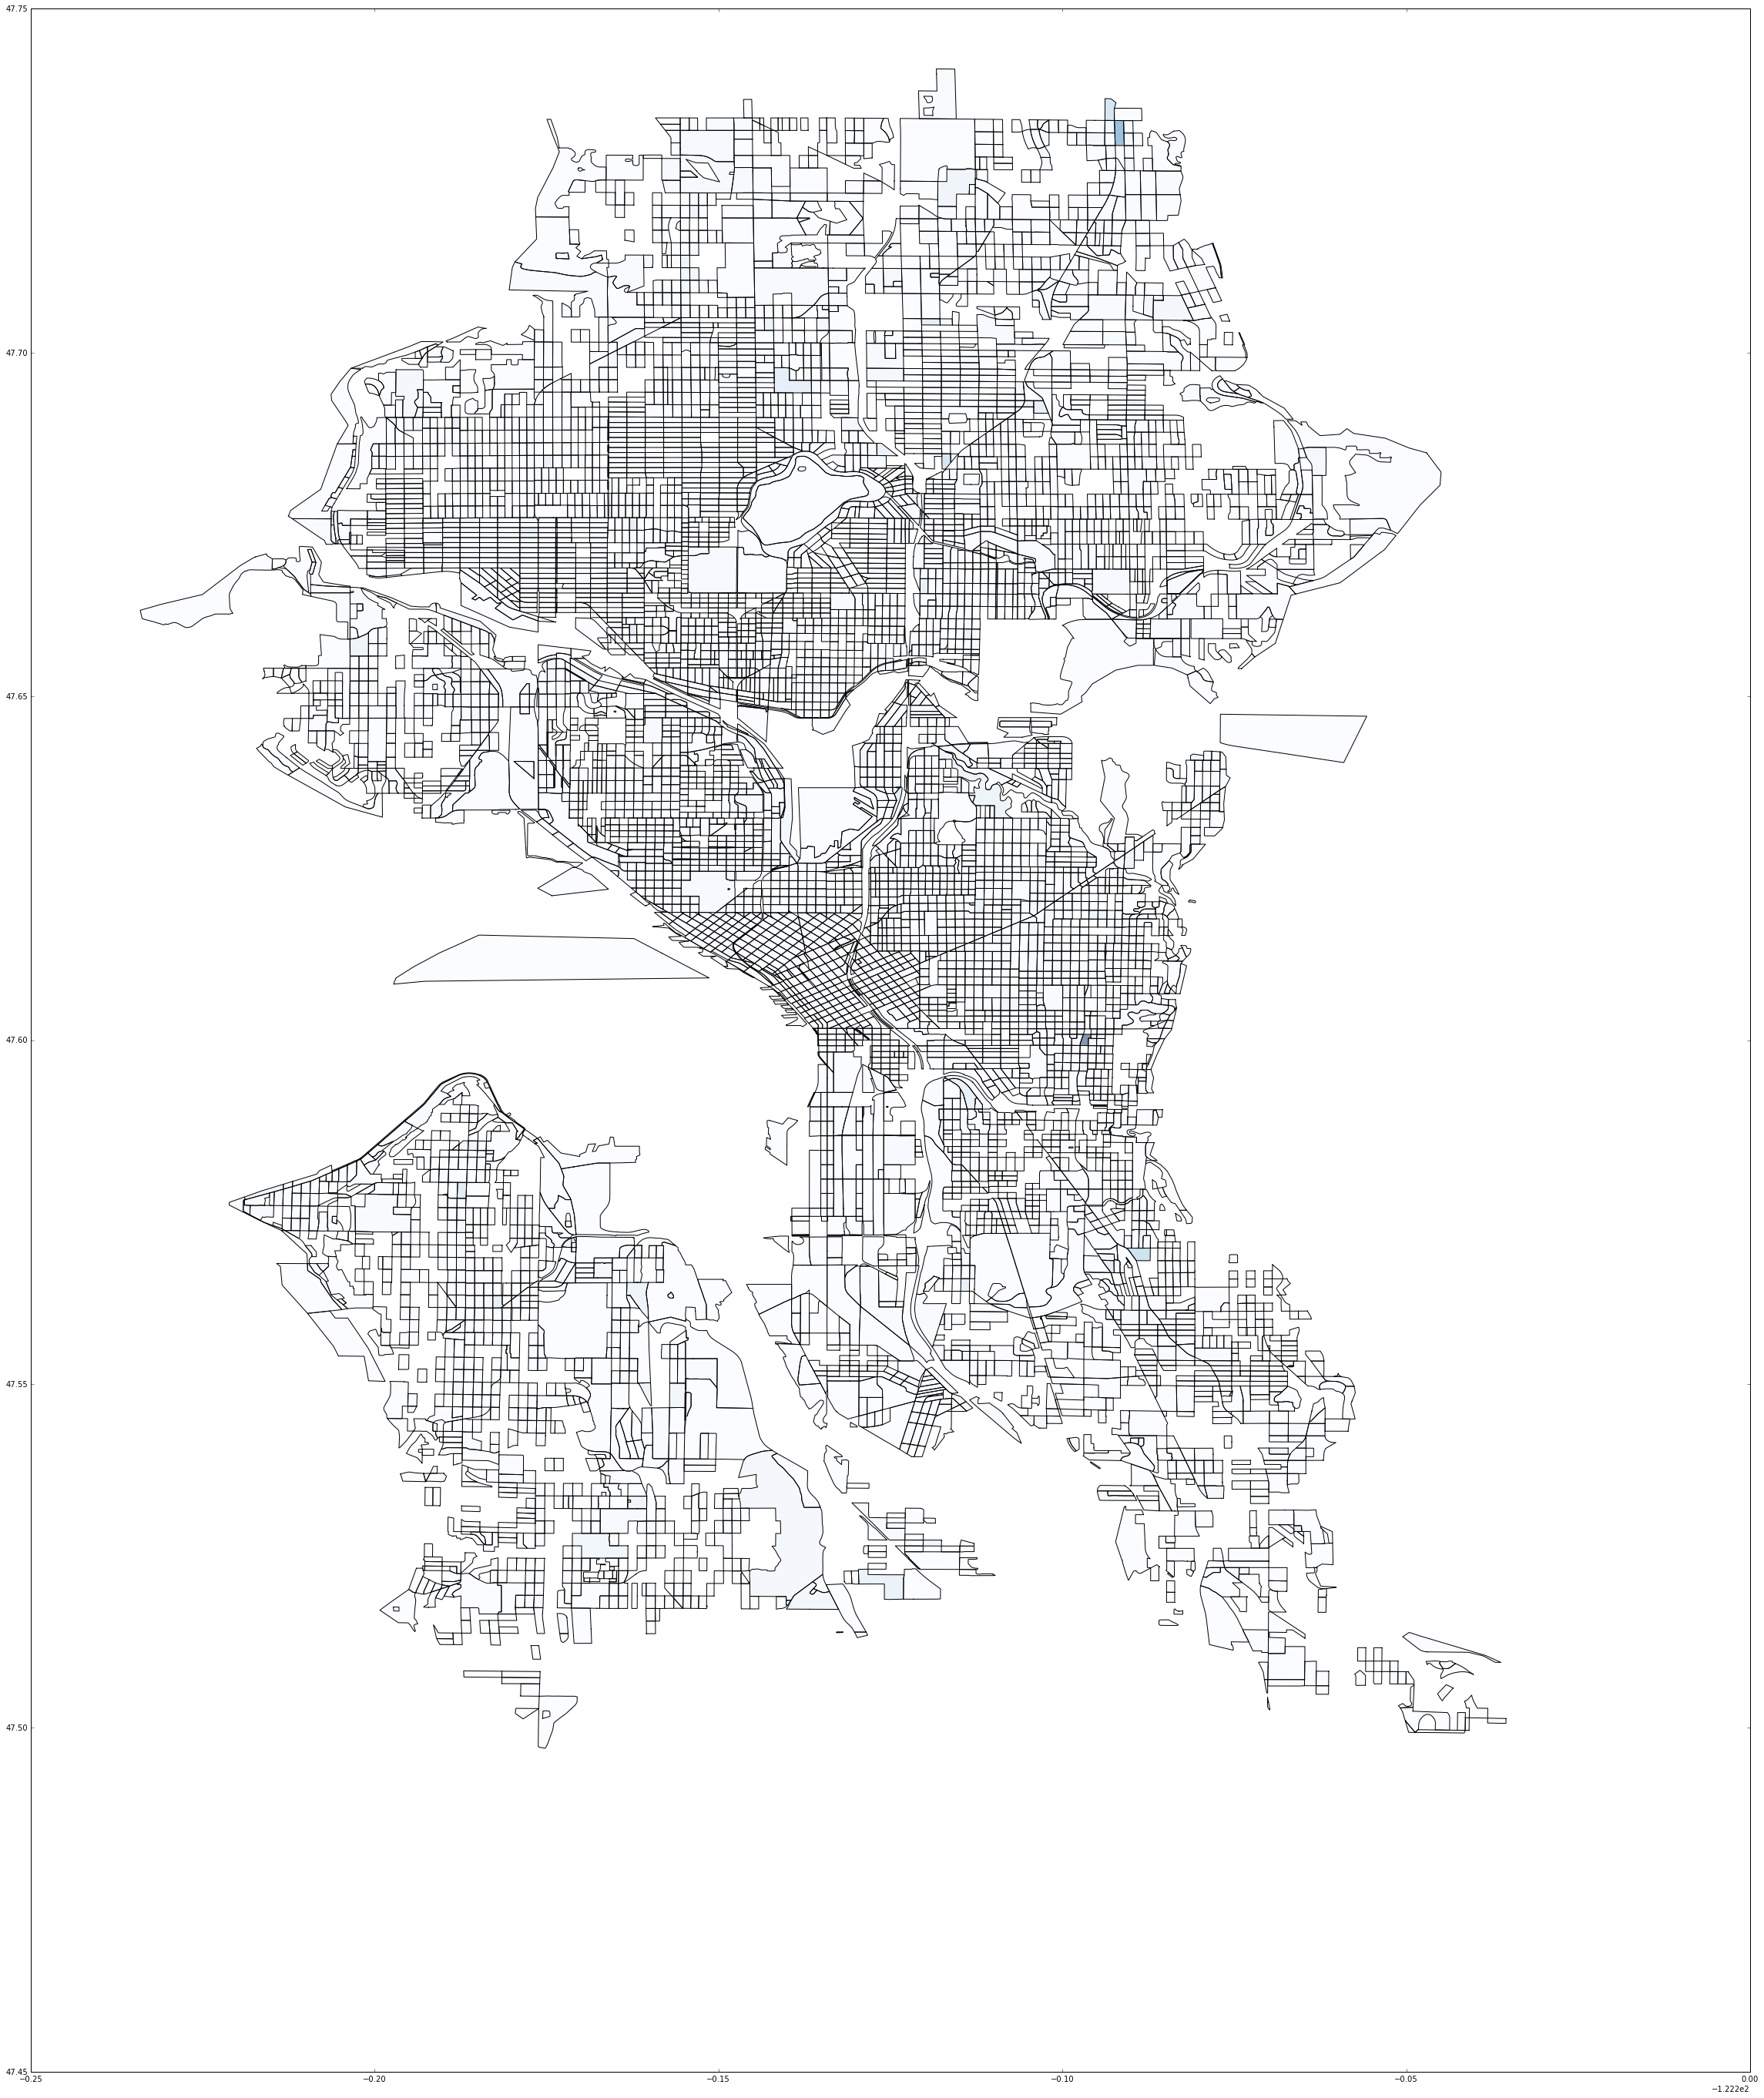

In [52]:
#
fig1 = flux_map_in.plot(column='0', cmap='Blues',figsize=(40,50))

plt.show()

In [11]:
for i in range(0,24):
    plot_flux(i,(80,100),flux_map_In)